In [1]:
import requests
import urllib.request
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from time import sleep
from random import randint

In [2]:
years = np.arange(2010,2021,1)

d = {}

for year in years:
    url = 'https://www.worldsurfleague.com/athletes/tour/mct?year=' + str(year)
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    right_table = soup.find('table', class_='tableType-athlete hasGroups')
    
    countries = right_table.findAll('span', class_='athlete-country-name')
    Country = []
    for country in countries:
        Country.append(country.text)
    df = pd.DataFrame()
    df['Country'] = Country
    df = df.iloc[:35]
    qs = pd.DataFrame(df['Country'].value_counts())
    qs = qs.T
    qs = qs.rename(index={'Country': (year)})
    d['qs{0}'.format(year)] = qs
        

In [3]:
#d

In [4]:
frame = [d['qs2010'],d['qs2011'],d['qs2012'],d['qs2013'],d['qs2014'],d['qs2015'],d['qs2016'],d['qs2017'],
         d['qs2018'],d['qs2019'],d['qs2020']]


In [5]:
df = pd.concat(frame)
df = df.fillna(0)
df

,Australia,United States,Hawaii,South Africa,Brazil,France,Portugal,Ireland,Spain,New Zealand,Japan,Italy
2010,16,8,4,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0
2011,14,7,3,2,6,2,1.0,0.0,0.0,0.0,0.0,0.0
2012,13,7,3,2,7,2,1.0,0.0,0.0,0.0,0.0,0.0
2013,12,7,4,2,7,2,0.0,1.0,0.0,0.0,0.0,0.0
2014,13,5,3,2,7,2,1.0,1.0,1.0,0.0,0.0,0.0
2015,12,5,5,1,8,2,0.0,1.0,0.0,1.0,0.0,0.0
2016,13,4,4,1,10,2,0.0,0.0,0.0,0.0,1.0,0.0
2017,12,4,3,1,9,3,1.0,0.0,0.0,0.0,1.0,1.0
2018,10,5,3,2,10,3,1.0,0.0,0.0,0.0,1.0,0.0
2019,7,4,4,1,12,3,1.0,0.0,0.0,1.0,1.0,1.0


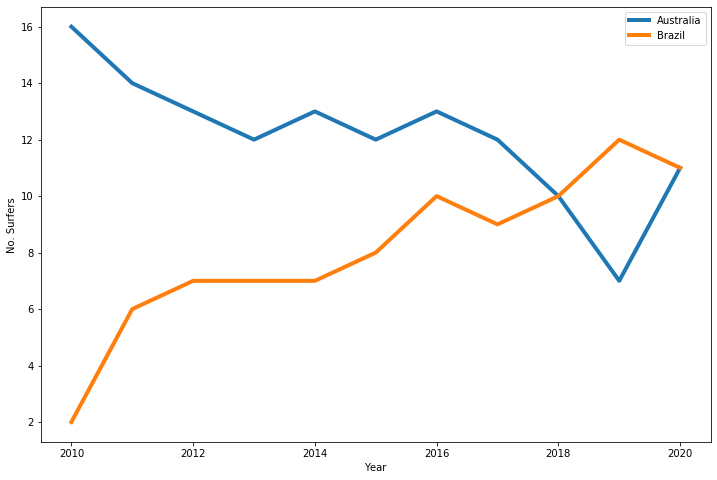

In [9]:
df['Australia'].plot(legend=True, figsize=(12,8), lw=4)
df['Brazil'].plot(legend=True, lw=4)

plt.xlabel('Year')
plt.ylabel('No. Surfers')

plt.savefig('ausbr_mct.jpeg')


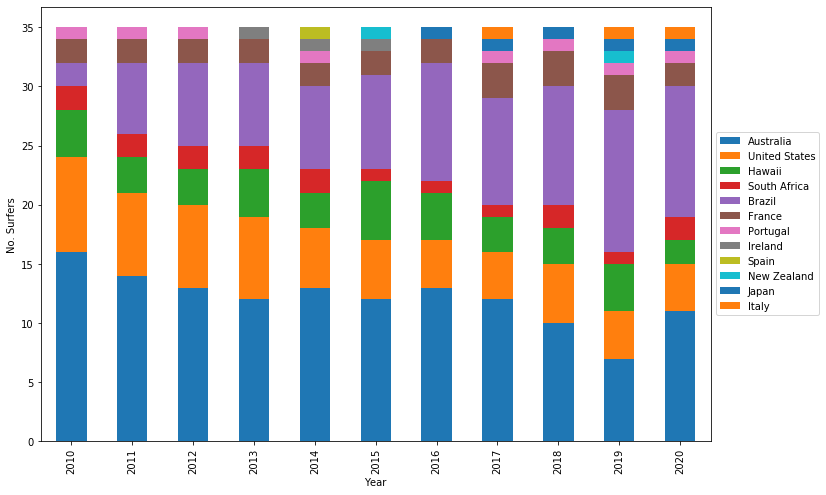

In [10]:
df.plot(kind='bar',stacked=True, figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

plt.xlabel('Year')
plt.ylabel('No. Surfers')

plt.savefig('allnations_mct.jpeg')
